In [1]:
# Data Processing and Wrangling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Graphing
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D

# Machine learning libraries
import tensorflow as tf
from tensorflow import keras
#import torch

# Reporting
from sklearn.metrics import classification_report

# Introduction
This data set used is the NASA JPL Asteroid database, which tracks asteroid objects over time. What I intend to do with this data is build a model that predicts which objects will be flagged as Potentially Hazardous objects or 'pha'. The web page for the data can be found on Kaggle here: https://www.kaggle.com/sakhawat18/asteroid-dataset

In [2]:
include_cols = ['spkid', 'pha', 'neo', 'H', 'diameter', 'albedo', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'class', 'rms']
explicit_dtypes = {'class': 'category', 'pha': 'category', 'neo': 'category'}
df = pd.read_csv('~/Downloads/dataset.csv', index_col = 'spkid', na_values=np.nan, usecols = include_cols, dtype=explicit_dtypes)
df2 = df.dropna(subset=['pha', 'neo'])
pha_new = df2.loc[:, 'pha'].map({'Y': 1, 'N': 0})
neo_new = df2.loc[:, 'neo'].map({'Y':1, 'N':0})
#print(df2['class'].unique())
#class_new = df2.loc[:, 'class'].map({'MBA':1, 'OMB':2, 'MCA':3, 'AMO':4, 'IMB':5, 'TJN':6, 'CEN':7, 'APO':8, 'ATE':9, 'AST':10, 'TNO':11, 'IEO':12})
df2.loc[:, 'pha'] = pha_new
df2.loc[:, 'neo'] = neo_new
#df2.loc[:, 'class'] = class_new
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   neo        938599 non-null  category
 1   pha        938599 non-null  category
 2   H          932337 non-null  float64 
 3   diameter   136209 non-null  float64 
 4   albedo     135103 non-null  float64 
 5   epoch_mjd  938599 non-null  int64   
 6   e          938599 non-null  float64 
 7   a          938599 non-null  float64 
 8   q          938599 non-null  float64 
 9   i          938599 non-null  float64 
 10  om         938599 non-null  float64 
 11  w          938599 non-null  float64 
 12  ma         938598 non-null  float64 
 13  ad         938599 non-null  float64 
 14  n          938599 non-null  float64 
 15  tp         938599 non-null  float64 
 16  tp_cal     938599 non-null  float64 
 17  per        938599 non-null  float64 
 18  per_y      938599 non-null  float64 


/home/jonah/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   neo        938599 non-null  category
 1   pha        938599 non-null  category
 2   H          932337 non-null  float64 
 3   diameter   136209 non-null  float64 
 4   albedo     135103 non-null  float64 
 5   epoch_mjd  938599 non-null  int64   
 6   e          938599 non-null  float64 
 7   a          938599 non-null  float64 
 8   q          938599 non-null  float64 
 9   i          938599 non-null  float64 
 10  om         938599 non-null  float64 
 11  w          938599 non-null  float64 
 12  ma         938598 non-null  float64 
 13  ad         938599 non-null  float64 
 14  n          938599 non-null  float64 
 15  tp         938599 non-null  float64 
 16  tp_cal     938599 non-null  float64 
 17  per        938599 non-null  float64 
 18  per_y      938599 non-null  float64 


In [4]:
num_data = df2.select_dtypes(exclude=['category', 'object'])
imp_num = SimpleImputer(strategy='mean')
imp_data = imp_num.fit_transform(num_data)

#imped_num = imp_num.transform(num_data)

imp_num_data = pd.DataFrame(data=imp_data, index=df2.index, columns=num_data.columns)
imp_num_data.index

Int64Index([2000001, 2000002, 2000003, 2000004, 2000005, 2000006, 2000007,
            2000008, 2000009, 2000010,
            ...
            3246486, 3246697, 3246735, 3246747, 3246764, 3246801, 3246834,
            3013075, 3246457, 3246553],
           dtype='int64', name='spkid', length=938599)

In [5]:
# Preprocessing Start
# Set random seed
# Separate values X and y.
cat_data = df2.select_dtypes(include='category')
# cat_data.info()
le = LabelEncoder()
cat_data2 = pd.DataFrame()
for i in ['neo', 'pha', 'class']:
    encoded = le.fit_transform(cat_data[i])
    cat_data2[i] = encoded
cat_data2.index = df2.index
df3 = pd.merge(imp_num_data, cat_data2, left_index=True, right_index=True)
#df3 = pd.merge(imp_num_data, cat_data, left_index=True, right_index=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          938599 non-null  float64
 1   diameter   938599 non-null  float64
 2   albedo     938599 non-null  float64
 3   epoch_mjd  938599 non-null  float64
 4   e          938599 non-null  float64
 5   a          938599 non-null  float64
 6   q          938599 non-null  float64
 7   i          938599 non-null  float64
 8   om         938599 non-null  float64
 9   w          938599 non-null  float64
 10  ma         938599 non-null  float64
 11  ad         938599 non-null  float64
 12  n          938599 non-null  float64
 13  tp         938599 non-null  float64
 14  tp_cal     938599 non-null  float64
 15  per        938599 non-null  float64
 16  per_y      938599 non-null  float64
 17  moid       938599 non-null  float64
 18  rms        938599 non-null  float64
 19  neo        93859

In [6]:
# To many parameters to print normally, so I used a different
#fig = plt.figure(figsize=(100,100))
#plt_snippet = df3[:100]
#snsplot = sns.pairplot(plt_snippet.iloc[:,[1,2,3,4]])
#plt.show()
#snsplot.savefig(f"/content/drive/MyDrive/Pictures/output.png")

In [7]:
#code = LabelEncoder()

y = df3.pop('pha')
#code.fit_transform(y)
X = df3
feats = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train.describe(), y_test.describe()

(count    563159.000000
 mean          0.002250
 std           0.047379
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000
 Name: pha, dtype: float64,
 count    375440.000000
 mean          0.002128
 std           0.046083
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000
 Name: pha, dtype: float64)

In [8]:
model_outputs = {}
def get_pred(model_func, x, y, x_t):
  model = model_func.fit(x, y)
  y_predicted = model.predict(x_t)
  return y_predicted

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
model_outputs['logreg'] = model_outputs.get('logreg', get_pred(logreg, X_train, y_train, X_test))

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
node_counts = [10, 100, 500]
def add_dt(max_nodes, x, y, x_test, y_test):
  dt = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=0)
  model = dt.fit(x, y)
  pred = model.predict(x_test)
  model_outputs[f"dt_{max_nodes}"] = model_outputs.get(f"dt_{max_nodes}", get_pred(dt, x, y, x_test))
  fig = plt.figure(figsize=(50,20))
  plot_tree(dt, feature_names=feats, class_names=['N','Y'])
  #fig.savefig(f"/content/drive/MyDrive/Pictures/decistion_tree_{max_nodes}.png")
for count in node_counts:
  add_dt(count, X_train, y_train, X_test, y_test)

/home/jonah/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


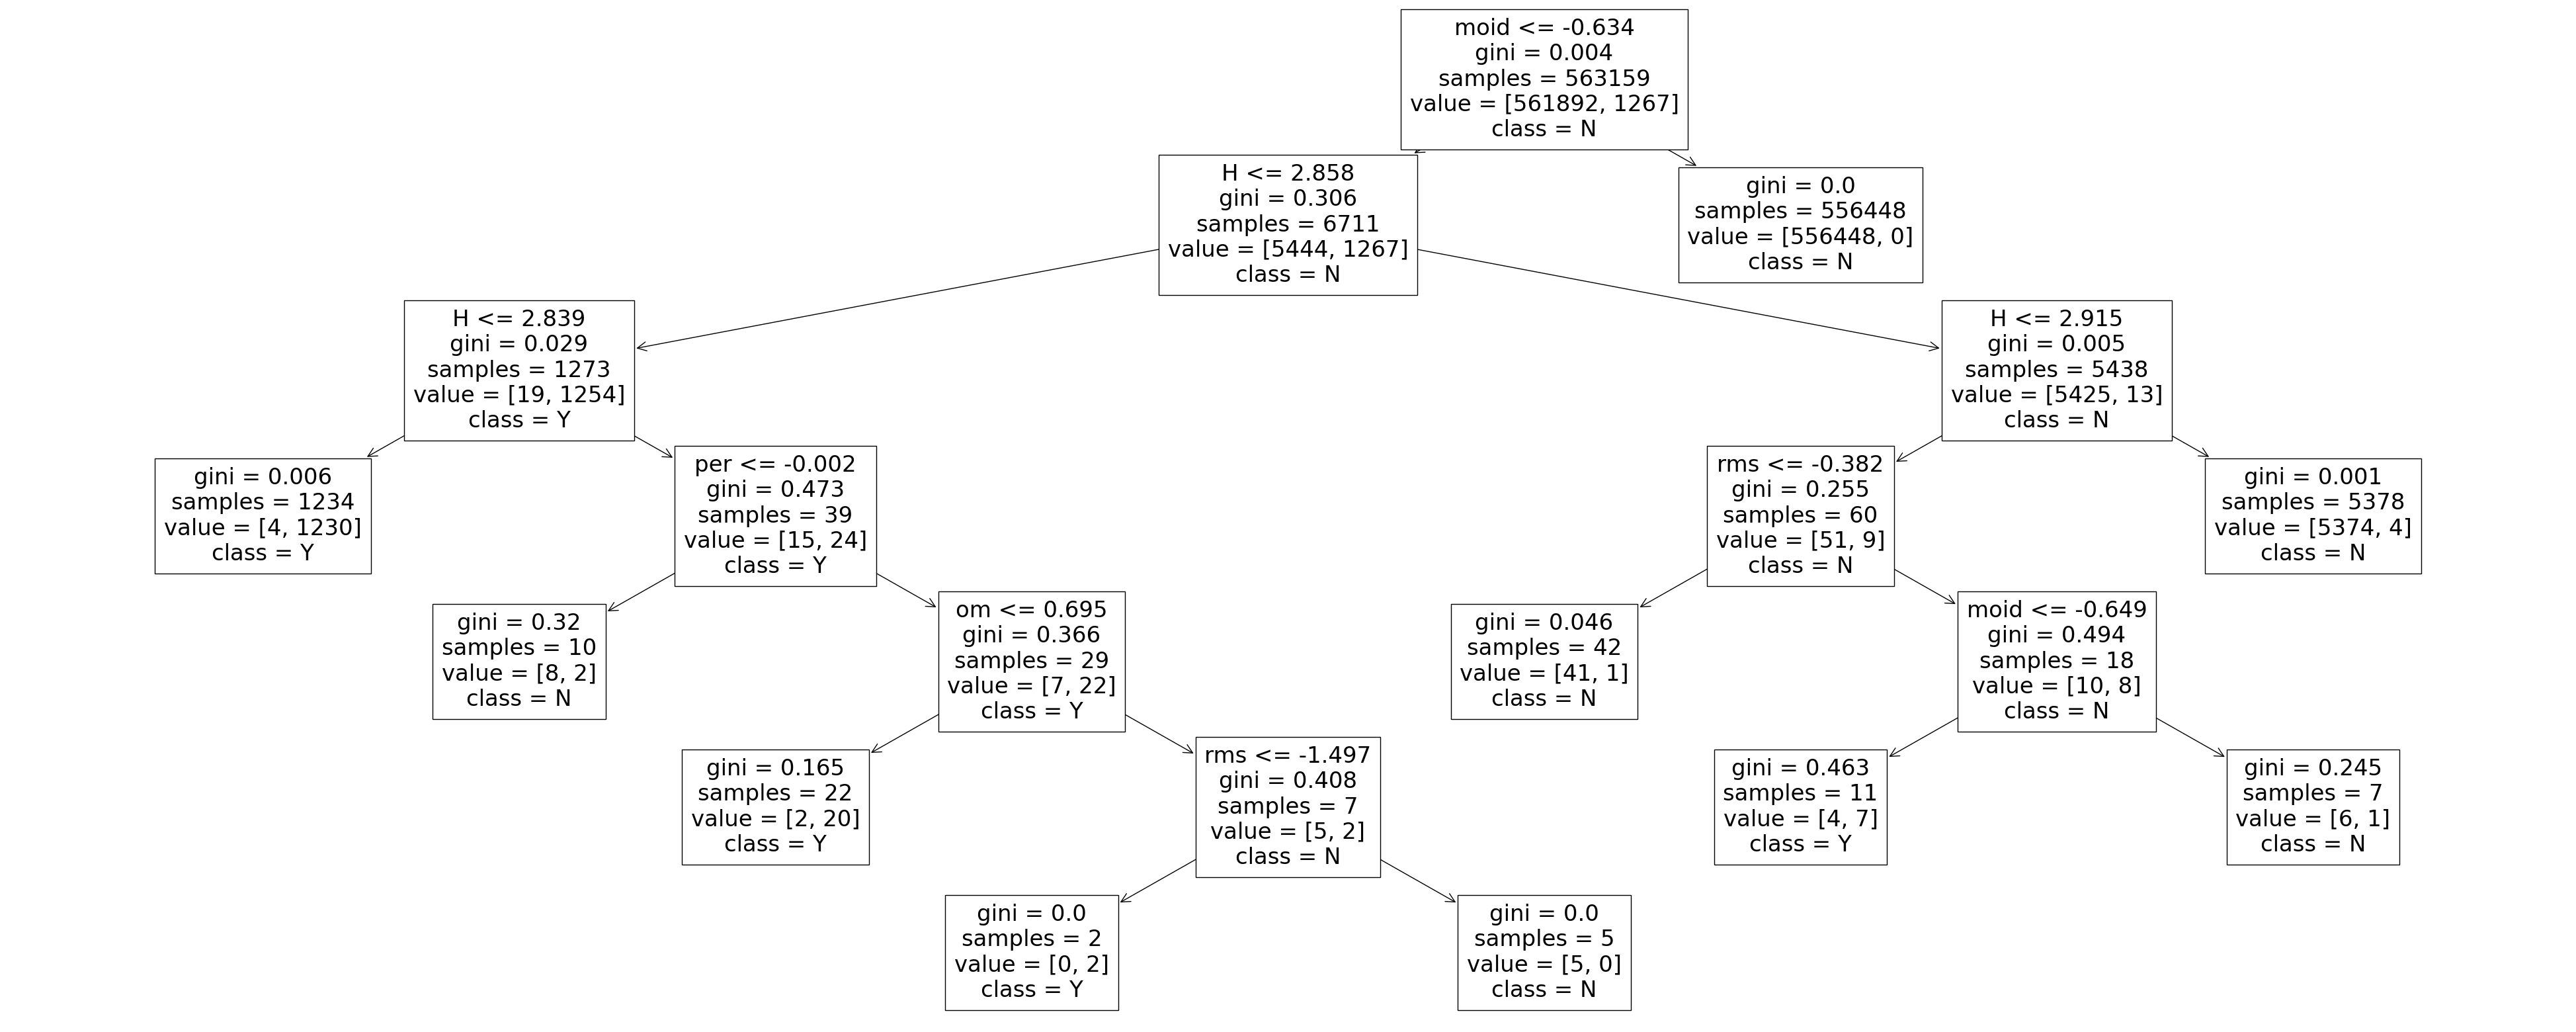

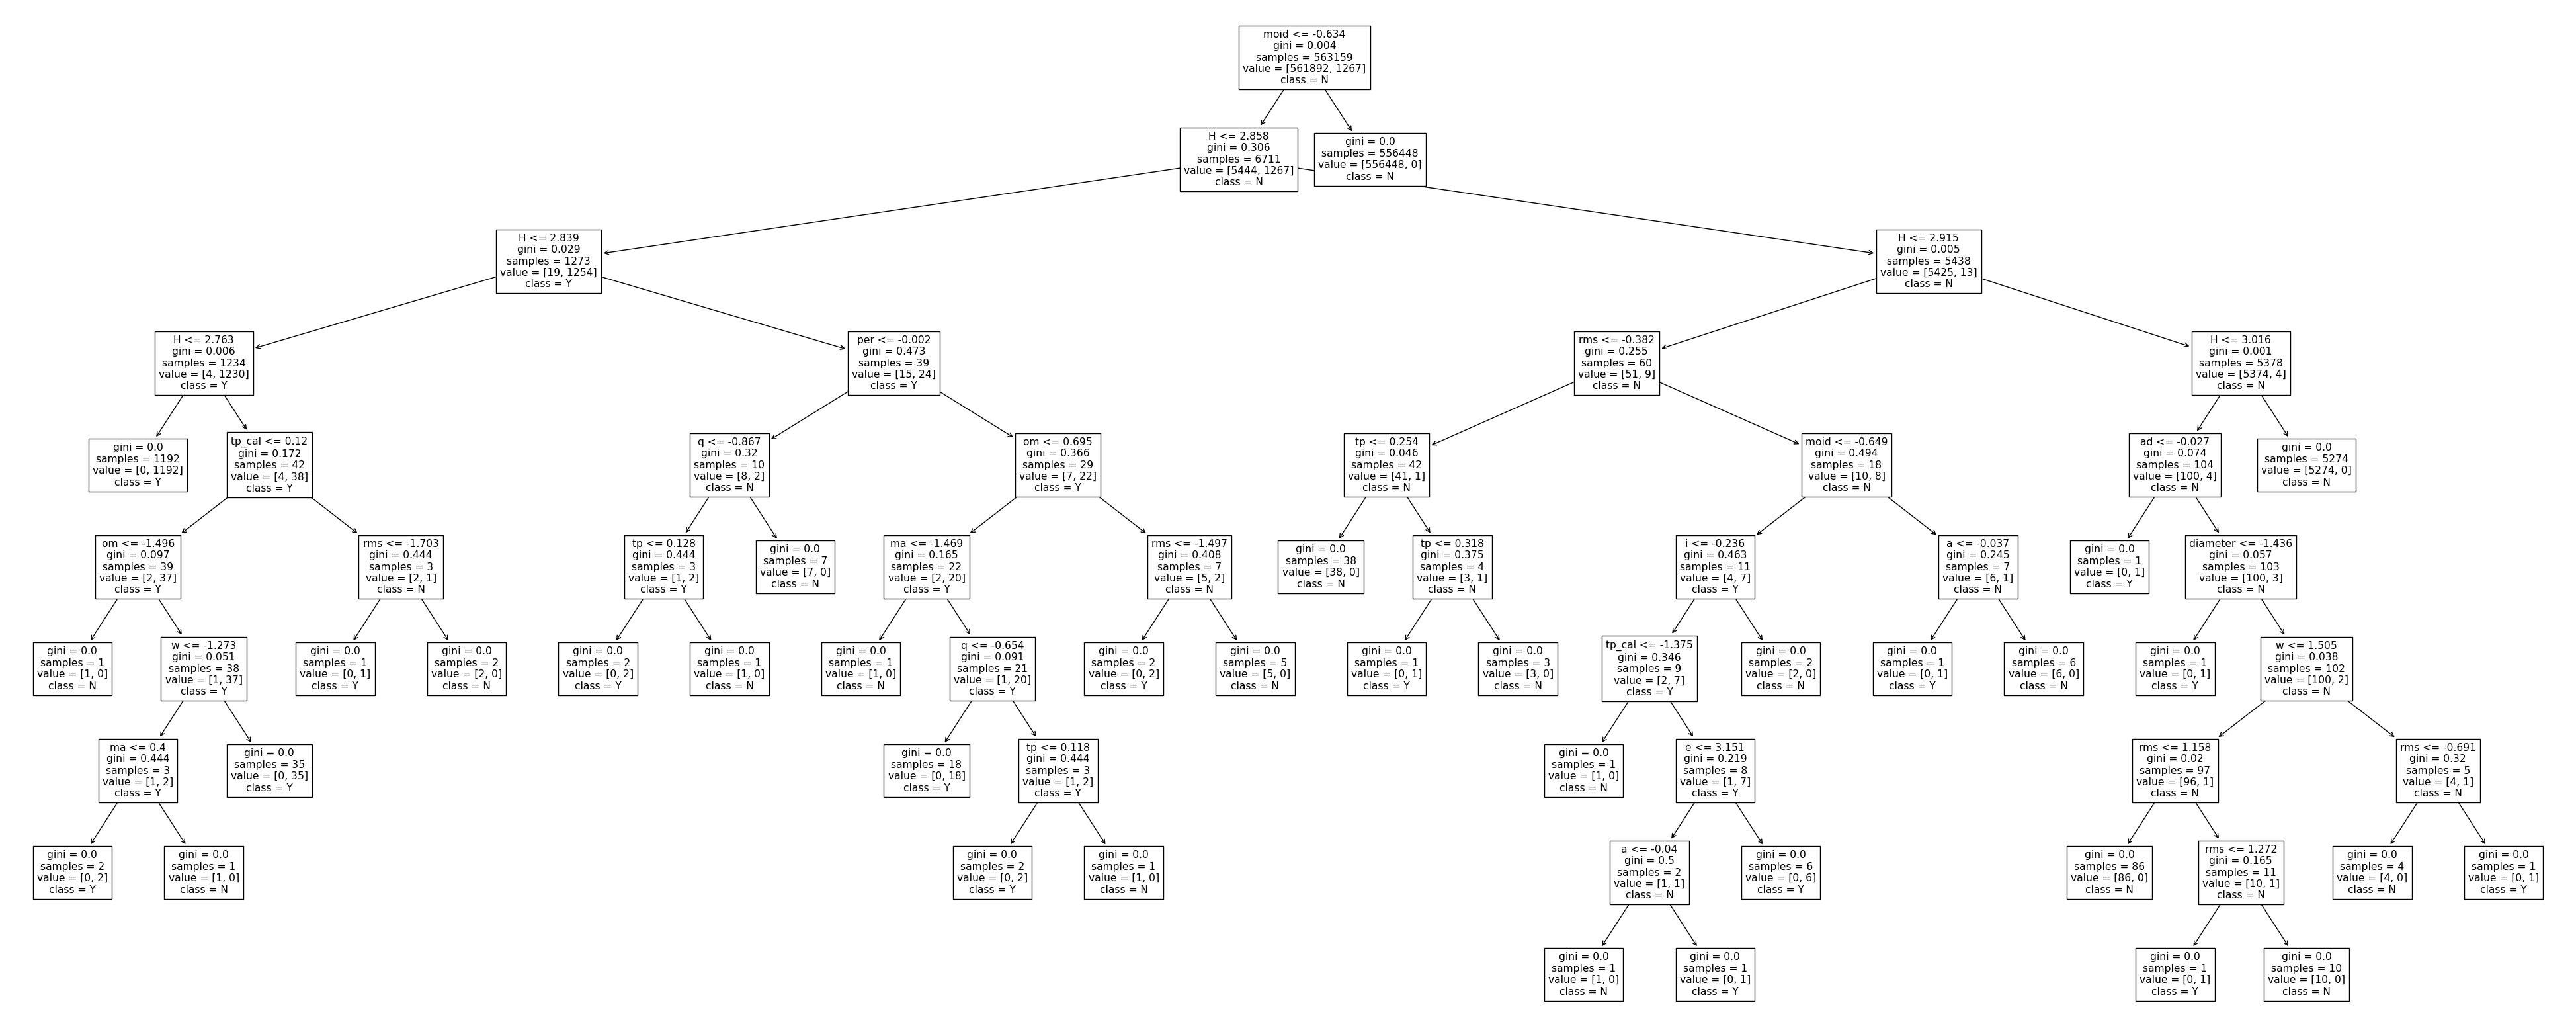

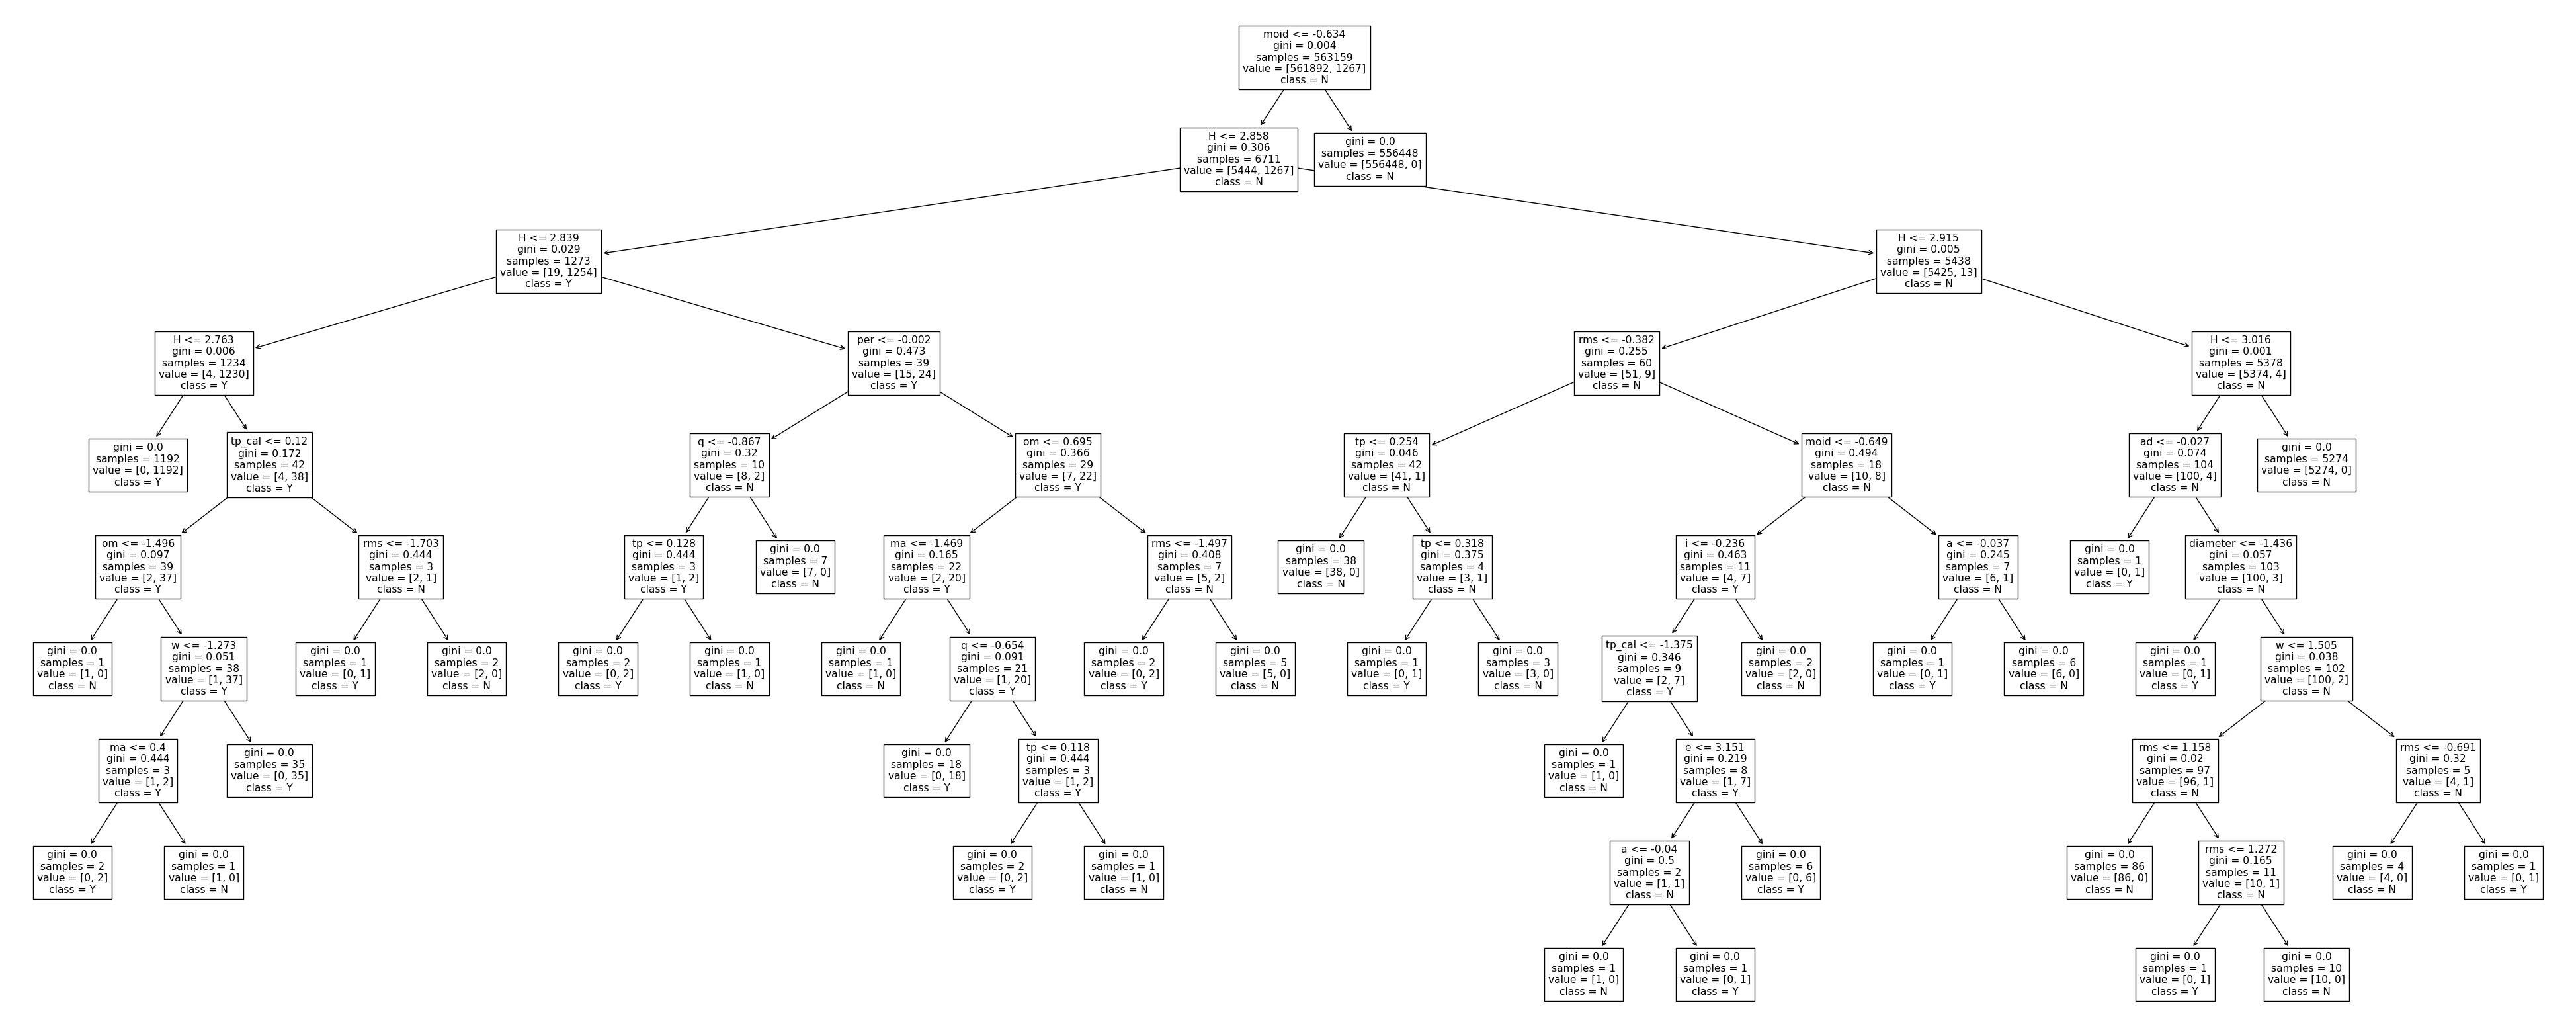

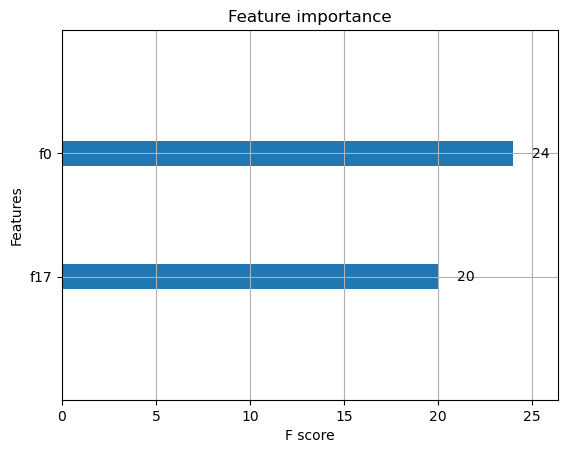

In [11]:
import xgboost as xgb
from xgboost import plot_importance
xgbmodel = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', tree_method='hist', n_estimators=10, max_depth=3, random_state=100)
model_outputs['xgb'] = model_outputs.get('xgb', get_pred(xgbmodel, X_train, y_train, X_test))

plot_importance(xgbmodel)
plt.show()


In [12]:
# Keras neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.wrappers import scikit_learn
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
#pha_new = df2.loc[:, 'pha'].map({'Y': 1, 'N': 0})

def create_model(learning_rate, activation):
  strategy = tf.distribute.MirroredStrategy()
  print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
  with strategy.scope():
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(21, input_shape = (21,), activation=activation))
    model.add(Dense(60, activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')
  return model

#y_train =to_categorical(y_train, dtype='object') 
#y_test = to_categorical(y_test, dtype='object')

In [ ]:
kmodel = scikit_learn.KerasClassifier(build_fn=create_model)
params = {'activation': ['relu', 'tanh'], 'batch_size': [8, 16, 32, 64, 128, 256], 'epochs': [3, 60], 'learning_rate': [0.1, 0.01, 0.001, 0.0001]}

random_search = RandomizedSearchCV(kmodel, param_distributions=params, cv=3, random_state=100)
search_results = random_search.fit(X_train, y_train)

print(f"Best {search_results.best_score_} using {search_results.best_params_}")

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_catch = EarlyStopping(monitor='val_loss', patience=5)
check = ModelCheckpoint('checkpoints/best_asteroid.hdf5', save_best_only = True)

kmodel = create_model(0.001, 'relu')

call_back = kmodel.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=500, callbacks=[early_stop_catch, check])
kpreds = kmodel.predict(X_test)

In [ ]:
model_outputs['keras'] = model_outputs.get('keras', kpreds)

In [ ]:
# Comparison
from sklearn.metrics import log_loss
model_log_loss=[]
for key, value in model_outputs.items():
  model_log_loss.append([key, log_loss(y_true = y_test, y_pred = value)])

model_log_loss_sorted = sorted(model_log_loss, key = lambda model: model[1])

print("Cross-Entropy by Model, Low to High")
for model in model_log_loss_sorted:
  print(f"{model[0]}: {model[1]}")

## Challenges
Had trouble optimizing the Keras neural network, but still ended up with an acceptable cross-entropy loss
## Conclusion
With all models, we were able to achieve low cross-entropy, indicating high reproducability and applicability. The value of this is that it is possible to correlate the values of this database with potentially hazardous objects, though the keras model appears to be overfit somewhat.